# HW NUMPY
## Выполнила Шеренешева Анастасия

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import timeit

## Упражнение №1

In [2]:
def f_time(f):
    start = timeit.default_timer()
    f
    return (timeit.default_timer() - start)

def mean_time(f):
    mean_time = []
    for i in range(100000):
        mean_time.append(f_time(f))
    return np.mean(mean_time)

[]

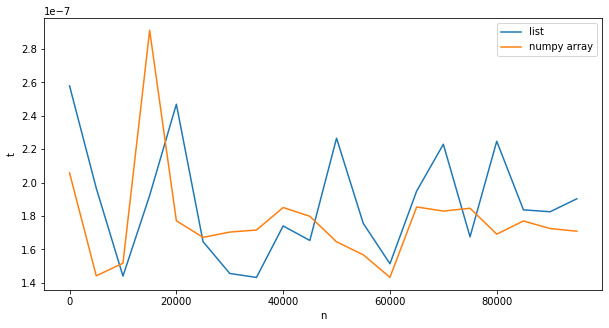

In [5]:
n = range(1, 100001, 5000)
list_time=[]
np_time=[]
for i in range(1, 10001, 500):
    X_list = [random.gauss(100, 10) for _ in range(1,i+1)]
    Y_list = [random.gauss(100, 10) for _ in range(1,i+1)]
    X_np = np.array(X_list)
    Y_np = np.array(Y_list)
    list_time.append(mean_time([(2*a**2 + 4*b) for a,b in zip(X_list,Y_list)]))
    np_time.append(mean_time((2*X_np**2 + 4*Y_np)))
    
plt.figure(figsize=(10,5))
plt.plot(n, list_time, label='list')
plt.plot(n, np_time, label='numpy array')
plt.xlabel('n')
plt.ylabel('t')
plt.legend()
plt.plot()

## Упражнение №2

In [6]:
A = np.arange(2, 76, 1)
A[A%2 == 0]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74])

In [7]:
A[A%2 != 0] = -1
A

array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])

## Упражнение №3

In [8]:
#np.isin() возвращает булеву маску массива,в котором мы ищем элементы другого массива
A = np.array([1,33,6,2,9,5,3])
B = np.array([4,7,33,1,8,9])
A[np.isin(A, B, invert=True)]

array([6, 2, 5, 3])

## Упражнение №4

In [9]:
n = random.randint(1, 101)
rand = np.random.randint(1, 101, size=(n, n))
print('Max:', np.max(rand))
print('Sum:', np.sum(rand))

Max: 100
Sum: 130722


In [10]:
rand = rand / np.max(rand)
rand

array([[0.32, 0.69, 0.44, ..., 0.67, 0.79, 0.25],
       [1.  , 0.01, 0.69, ..., 0.62, 0.5 , 0.15],
       [0.15, 0.22, 0.55, ..., 0.75, 0.8 , 0.67],
       ...,
       [0.12, 0.8 , 0.02, ..., 0.14, 0.22, 0.62],
       [0.04, 0.75, 0.31, ..., 0.88, 0.55, 0.65],
       [0.91, 0.73, 0.1 , ..., 0.84, 0.63, 0.49]])

In [11]:
for i in range(rand.shape[0]):
    mean = np.mean(rand[i,:])
    for j in range(rand.shape[1]):
        rand[i,j] -= mean
rand

array([[-0.17411765,  0.19588235, -0.05411765, ...,  0.17588235,
         0.29588235, -0.24411765],
       [ 0.43254902, -0.55745098,  0.12254902, ...,  0.05254902,
        -0.06745098, -0.41745098],
       [-0.35392157, -0.28392157,  0.04607843, ...,  0.24607843,
         0.29607843,  0.16607843],
       ...,
       [-0.3654902 ,  0.3145098 , -0.4654902 , ..., -0.3454902 ,
        -0.2654902 ,  0.1345098 ],
       [-0.50803922,  0.20196078, -0.23803922, ...,  0.33196078,
         0.00196078,  0.10196078],
       [ 0.39098039,  0.21098039, -0.41901961, ...,  0.32098039,
         0.11098039, -0.02901961]])

In [12]:
rand[rand == np.max(rand)] = -1
np.min(rand)

-1.0

## Упражнение №5

In [13]:
def no_nan(X):
    A = np.copy(X)
    if (np.sum(np.isnan(A)) == A.size): 
        A = np.zeros_like(A)
    else:
        A[np.isnan(A)] = np.mean(A[~np.isnan(A)])
    return A

In [14]:
X=np.array([[[2,1],[3,np.nan]]])
X

array([[[ 2.,  1.],
        [ 3., nan]]])

In [15]:
Y = np.array([np.nan, np.nan])
Y

array([nan, nan])

In [16]:
no_nan(X)

array([[[2., 1.],
        [3., 2.]]])

In [17]:
no_nan(Y)

array([0., 0.])

## Упражнение №6

In [18]:
def norm(A):
    A = np.abs(A)
    maximum = np.max(A)
    A = A / maximum
    return A

In [19]:
ex = np.random.randint(-100, 100, size=(3,3))
ex

array([[  4, -27, -26],
       [-75,  -6, -25],
       [-31,  89,  48]])

In [20]:
norm(ex)

array([[0.04494382, 0.30337079, 0.29213483],
       [0.84269663, 0.06741573, 0.28089888],
       [0.34831461, 1.        , 0.53932584]])

## Упражнение №7

In [21]:
print(ex)
np.savetxt('test.txt', ex)
ex_copy = np.loadtxt('test.txt')
print(ex_copy)

[[  4 -27 -26]
 [-75  -6 -25]
 [-31  89  48]]
[[  4. -27. -26.]
 [-75.  -6. -25.]
 [-31.  89.  48.]]


In [22]:
type(ex_copy)

numpy.ndarray

## Упражнение №8

In [23]:
ex2 = np.random.randint(-100, 100, (10,10))
print(ex2)
x = np.random.randint(-100,100)
print(x)

[[  92  -64  -11   65   50  -46  -37    9  -53  -85]
 [ -68  -41  -97   12   77   42  -54   -5    2    4]
 [  76  -97  -72   98  -16   76  -27   61  -95   75]
 [   7  -25   97  -67   39  -76  -54  -12   16  -73]
 [  88  -86   59   24   73   61  -86  -20  -13  -24]
 [ -15   76   96  -72   58    5   89   58    3  -48]
 [  20  -97   52  -28  -61   65  -22   61   61  -59]
 [  47   72 -100  -15   52   39  -59  -10  -21   11]
 [  87   -5   50    1  -42  -74  -25  -85   38   44]
 [  64  -19   30    6  -38    8   49   75   95   64]]
-13


In [24]:
ex2[np.unravel_index(np.argmin(np.abs(ex2-x)), ex2.shape)]

-13

## Упражнение №9

In [25]:
def strange_array(n, m, a, b):
    A = np.zeros((n,m))
    A[0,range(m)] = a
    A[n-1, range(m)] = a
    A[range(n), 0] = a
    A[range(n), m-1] = a
    A[A != a] = b
    return A
strange_array(10, 5, 6, -1)

array([[ 6.,  6.,  6.,  6.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6., -1., -1., -1.,  6.],
       [ 6.,  6.,  6.,  6.,  6.]])

## Упражнение №10

In [26]:
def sort_matrix(matrix, col_num):
    col = matrix[:, col_num]
    ind = col.argsort()
    new_matrix = np.array([matrix[i,:] for i in ind])
    return new_matrix

In [27]:
A = np.arange(9,0,-1).reshape(3,3)
A

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [28]:
sort_matrix(A, 1)

array([[3, 2, 1],
       [6, 5, 4],
       [9, 8, 7]])

## Упражнение №11

In [29]:
def chess(shape):
    num = shape // 2 
    row_1 = np.array((0,1) * num)
    row_2 = np.array([row_1, row_1[::-1]])
    chess = np.tile(row_2, (num,1))
    if(shape % 2 != 0):
        chess = np.vstack((chess, row_1))
        row_1 = np.reshape(np.append(row_1, 0), (-1,1))
        chess = np.hstack((chess, row_1))
    return chess

In [30]:
chess(7)

array([[0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0]])

In [31]:
chess(6)

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0]])

## Упражнение №12

In [32]:

%matplotlib notebook

def neighbours(field):
    N = len(field)
    zer1 = np.zeros(N)
    new_field = np.vstack((np.vstack((zer1, field)), zer1))
    zer2 = np.reshape(np.zeros(N+2),(-1,1))
    new_field = np.hstack((np.hstack((zer2, new_field)), zer2)) #добавили нулевые границы в матрицу поля, чтобы не возиться с
                                                                # индексами на границе 
    neighb_sum = np.zeros_like(field)
    for i in range(1, N+1):
        for j in range(1, N+1):
            neighb_ind_i = np.array([i-1,i-1,i-1, i,i, i+1,i+1,i+1]) #индексы соседних элементов
            neighb_ind_j = np.array([j-1,j,j+1, j-1,j+1, j-1,j,j+1])
            neighb_sum[i-1,j-1] = new_field[neighb_ind_i, neighb_ind_j].sum() #считаем сколько живых соседей
    return neighb_sum
            
    

def life(N): #N - размер поля
    
    field = np.random.randint(2, size=(N,N))
    
    fig = plt.figure(figsize=(8,8))
    plt.ion()
    ax = fig.add_subplot()
    fig.show()
    fig.canvas.draw()
    
    while(field.sum() != 0):
        neighb_sum = neighbours(field)
        for i in range(N):
            for j in range(N):
                if (field[i,j] == 1):
                    if (neighb_sum[i,j] < 2):
                        field[i,j] = 0
                    elif ((neighb_sum[i,j] == 2) | (neighb_sum[i,j] == 3)):
                        field[i,j] = 1
                    elif (neighb_sum[i,j] > 3):
                        field[i,j] = 0
                else:
                    if (neighb_sum[i,j] == 3):
                        field[i,j] = 1

        ax.clear()
        plt.imshow(field)  
        fig.canvas.draw()
        plt.pause(1)
    plt.ioff()

    return


<IPython.core.display.Javascript object>


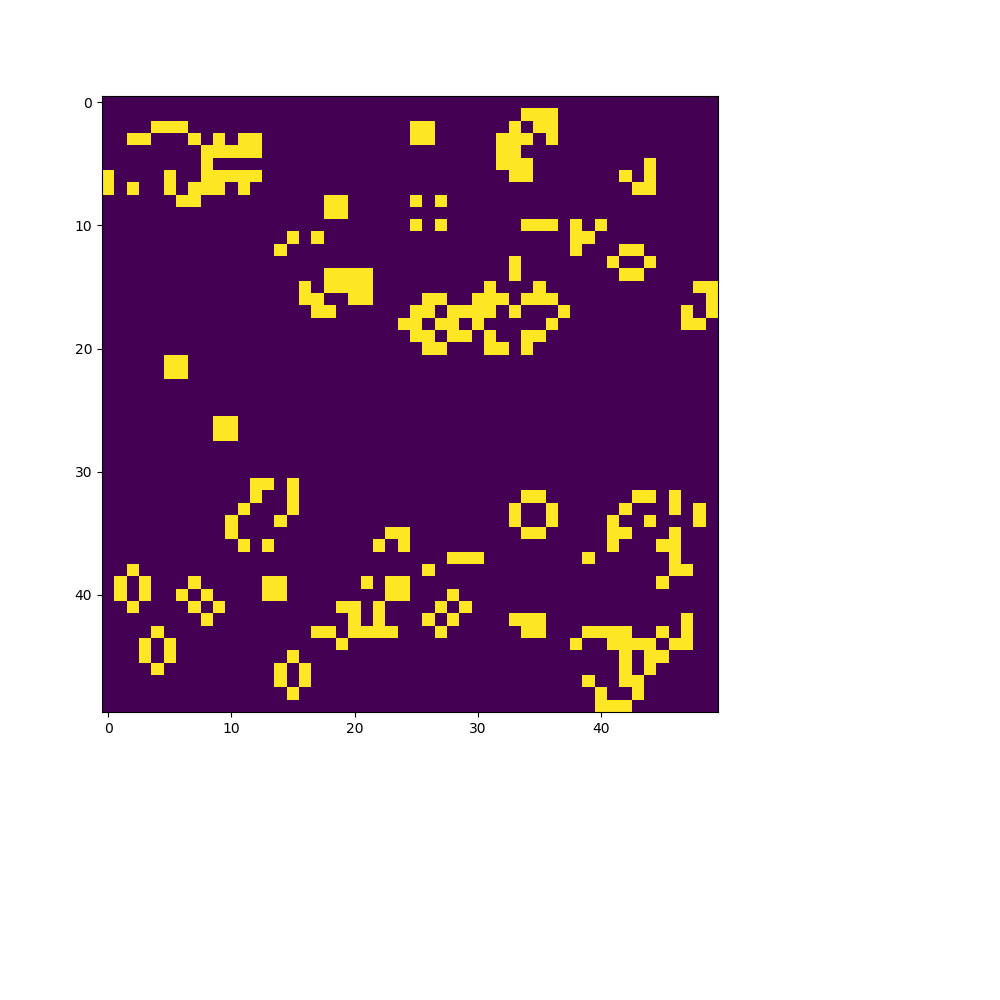

KeyboardInterrupt: 

In [39]:
life(50)